In [16]:
# Import modules
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import os


def work_space(path):
    while True:
        if os.path.split(path)[1] != "Phys117":
            path = os.path.split(path)[0]
        else:
            return path.replace("\\", "/")

work_dir = work_space(os.getcwd())
data_path = work_dir + "/Markus/Hub/VariableData/"
folders = os.listdir(data_path)
data_files = [data_path + data_file for data_file in folders]
stuffs = ["electron", "jet", "MET", "muon", "photon", "tau"]
data_variables = ["met", "HT", "stuff_amount", "ptmax", "phi_diff"]
file_amounts = [2, 18, 3]


def unpacker(folder_data, new_folder_data):
    for nested_list in folder_data:
        if type(nested_list) == list:
            unpacker(nested_list, new_folder_data)
        else:
            new_folder_data.append(nested_list)
    folder_data = new_folder_data
    return folder_data


def data_binner(data, binsize):
    data = unpacker(data, [])

    if len(data) == 0:
        x = [bin * binsize for bin in range(200)]
        y = [0 for bin in range(200)]
        return x, y

    max_value = np.max(data)
    bins = int(np.round(max_value / binsize))
    bins = np.arange(0, bins)
    data = np.array(data)
    x, y = [], []

    for bin in range(len(bins)):
        temp = data
        temp = temp[temp <= (bin + 1/2)*binsize]
        temp = temp[(bin - 1/2)*binsize < temp]
        if len(temp) != 0:
            y.append(len(temp))
            x.append(bin*binsize)

    y = y/np.sum(y)

    return x, y


def plot_filter(interval_data, filter_strength):
    interval_data = sorted(interval_data)
    cutoff = round((len(interval_data) * filter_strength))
    interval_data = interval_data[:cutoff]
    x_min = np.min(interval_data)
    x_max = np.max(interval_data)
    extra = (x_max - x_min) / 10
    return [x_min - extra, x_max + extra]


def sampler(output_dataframe, output_filenames, file_amounts, combine_data):
    from random import sample

    output_dataframe = [[(dataframe, filename) for dataframe, filename in zip(dataframes, filenames)] for dataframes, filenames in zip(output_dataframe, output_filenames)]
    samples = [sample(dataframes, file_amount) for dataframes, file_amount in zip(output_dataframe, file_amounts)]

    if combine_data:
        output_dataframe = [pd.concat([sample[0] for sample in dataframes]) for dataframes in samples]
        labels = folders
    else:
        output_dataframe = [[sample[0] for sample in dataframes] for dataframes in samples]
        labels = [[sample[1] for sample in dataframes] for dataframes in samples]
    
    output_dataframe = unpacker(output_dataframe, [])
    labels = unpacker(labels, [])
        

    return output_dataframe, labels


def plotter(data_variables, output_dataframe, output_filenames, filter_strengths, binsizes):

    for variable_index, variable in enumerate(data_variables):
        fig = plt.figure()
        style = "seaborn-darkgrid"
        plt.style.use(style)
        title = variable + " Distribution"
        fig.suptitle(title)
        plt.xlabel(variable)
        plt.ylabel("frequency")

        binsize = binsizes[variable_index] if type(binsizes) == list else binsizes
        filter_strength = filter_strengths[variable_index] if type(filter_strengths) == list else filter_strengths
        interval = np.concatenate([dataframe[variable] for dataframe in output_dataframe])
        plt.xlim(plot_filter(interval, filter_strength))

        for dataframe, label in zip(output_dataframe, output_filenames):
            print(dataframe)
            raw_data = dataframe[variable]
            bins, counts = data_binner(raw_data, binsize)
            plt.plot(bins, counts, label = label)
        
        plt.legend(prop = {'size': 8})
        plt.show()

In [17]:
from FilesFunc import files
folder_list, filename_list = files(data_path, folders, file_amounts)


foldered_dataframes = [[pd.read_csv(data_file).drop("Unnamed: 0", axis = 1) for data_file in folder_files] for folder_files in folder_list]

In [18]:
data_sample, labels = sampler(foldered_dataframes, filename_list, file_amounts = [0, 18, 3], combine_data = False)

          met       HT  stuff_amount    ptmax  phi_diff
0      208.16  3012.88             6  1323.56  0.066407
1      210.61  6777.61             7  2294.89  0.714593
2      429.09  7494.16            14  1836.94  2.906593
3     1375.98  3234.90             6  1375.98  0.000000
4      465.36  8347.06            13  2353.15  0.260407
...       ...      ...           ...      ...       ...
9993  1978.89  5822.34             7  2755.65  0.245593
9994   158.81  7761.95            11  2737.63  2.138593
9995   691.07  6796.78             9  1599.09  2.657000
9996   623.70  7140.62            10  2406.81  0.425593
9997  2409.62  7957.32             6  2820.29  2.332185

[9998 rows x 5 columns]
          met        HT  stuff_amount    ptmax  phi_diff
0      291.17   8953.26            15  2216.98  0.529000
1      226.02   8472.20             8  3870.42  2.160593
2     3630.03  11368.08             6  4718.03  2.512000
3     2567.59   9946.36             9  2567.59  0.000000
4      267.49   71

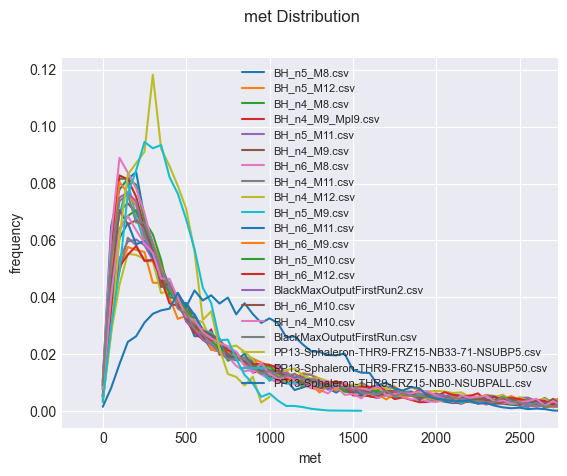

          met       HT  stuff_amount    ptmax  phi_diff
0      208.16  3012.88             6  1323.56  0.066407
1      210.61  6777.61             7  2294.89  0.714593
2      429.09  7494.16            14  1836.94  2.906593
3     1375.98  3234.90             6  1375.98  0.000000
4      465.36  8347.06            13  2353.15  0.260407
...       ...      ...           ...      ...       ...
9993  1978.89  5822.34             7  2755.65  0.245593
9994   158.81  7761.95            11  2737.63  2.138593
9995   691.07  6796.78             9  1599.09  2.657000
9996   623.70  7140.62            10  2406.81  0.425593
9997  2409.62  7957.32             6  2820.29  2.332185

[9998 rows x 5 columns]
          met        HT  stuff_amount    ptmax  phi_diff
0      291.17   8953.26            15  2216.98  0.529000
1      226.02   8472.20             8  3870.42  2.160593
2     3630.03  11368.08             6  4718.03  2.512000
3     2567.59   9946.36             9  2567.59  0.000000
4      267.49   71

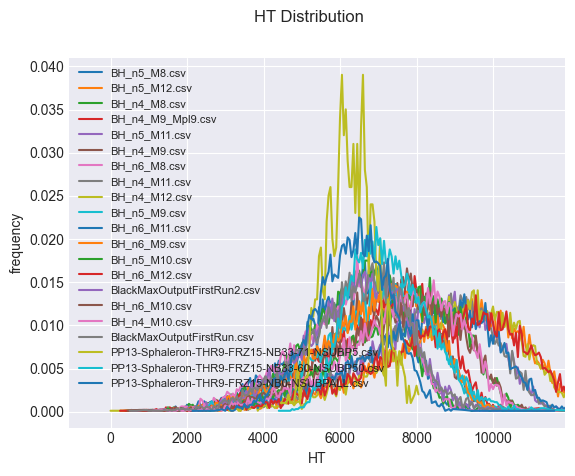

          met       HT  stuff_amount    ptmax  phi_diff
0      208.16  3012.88             6  1323.56  0.066407
1      210.61  6777.61             7  2294.89  0.714593
2      429.09  7494.16            14  1836.94  2.906593
3     1375.98  3234.90             6  1375.98  0.000000
4      465.36  8347.06            13  2353.15  0.260407
...       ...      ...           ...      ...       ...
9993  1978.89  5822.34             7  2755.65  0.245593
9994   158.81  7761.95            11  2737.63  2.138593
9995   691.07  6796.78             9  1599.09  2.657000
9996   623.70  7140.62            10  2406.81  0.425593
9997  2409.62  7957.32             6  2820.29  2.332185

[9998 rows x 5 columns]
          met        HT  stuff_amount    ptmax  phi_diff
0      291.17   8953.26            15  2216.98  0.529000
1      226.02   8472.20             8  3870.42  2.160593
2     3630.03  11368.08             6  4718.03  2.512000
3     2567.59   9946.36             9  2567.59  0.000000
4      267.49   71

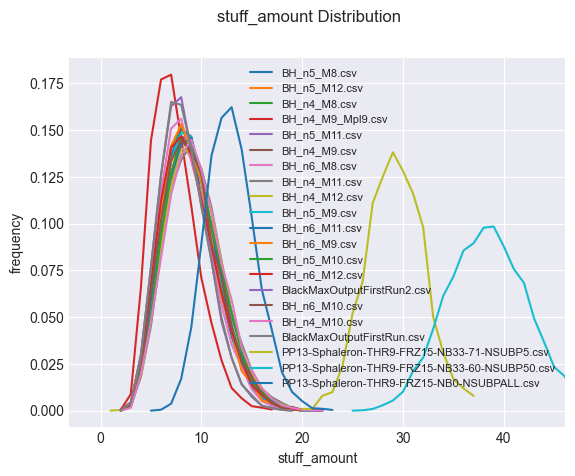

          met       HT  stuff_amount    ptmax  phi_diff
0      208.16  3012.88             6  1323.56  0.066407
1      210.61  6777.61             7  2294.89  0.714593
2      429.09  7494.16            14  1836.94  2.906593
3     1375.98  3234.90             6  1375.98  0.000000
4      465.36  8347.06            13  2353.15  0.260407
...       ...      ...           ...      ...       ...
9993  1978.89  5822.34             7  2755.65  0.245593
9994   158.81  7761.95            11  2737.63  2.138593
9995   691.07  6796.78             9  1599.09  2.657000
9996   623.70  7140.62            10  2406.81  0.425593
9997  2409.62  7957.32             6  2820.29  2.332185

[9998 rows x 5 columns]
          met        HT  stuff_amount    ptmax  phi_diff
0      291.17   8953.26            15  2216.98  0.529000
1      226.02   8472.20             8  3870.42  2.160593
2     3630.03  11368.08             6  4718.03  2.512000
3     2567.59   9946.36             9  2567.59  0.000000
4      267.49   71

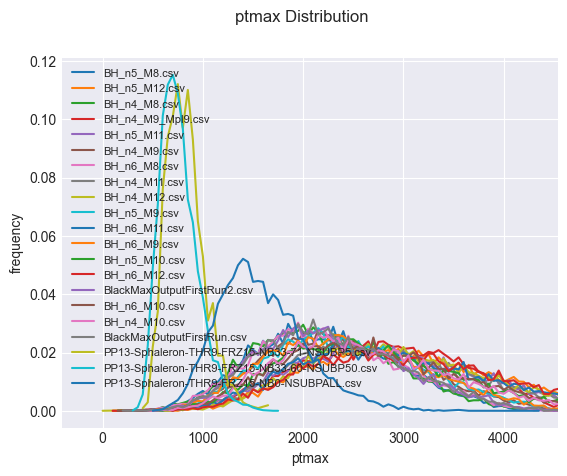

          met       HT  stuff_amount    ptmax  phi_diff
0      208.16  3012.88             6  1323.56  0.066407
1      210.61  6777.61             7  2294.89  0.714593
2      429.09  7494.16            14  1836.94  2.906593
3     1375.98  3234.90             6  1375.98  0.000000
4      465.36  8347.06            13  2353.15  0.260407
...       ...      ...           ...      ...       ...
9993  1978.89  5822.34             7  2755.65  0.245593
9994   158.81  7761.95            11  2737.63  2.138593
9995   691.07  6796.78             9  1599.09  2.657000
9996   623.70  7140.62            10  2406.81  0.425593
9997  2409.62  7957.32             6  2820.29  2.332185

[9998 rows x 5 columns]
          met        HT  stuff_amount    ptmax  phi_diff
0      291.17   8953.26            15  2216.98  0.529000
1      226.02   8472.20             8  3870.42  2.160593
2     3630.03  11368.08             6  4718.03  2.512000
3     2567.59   9946.36             9  2567.59  0.000000
4      267.49   71

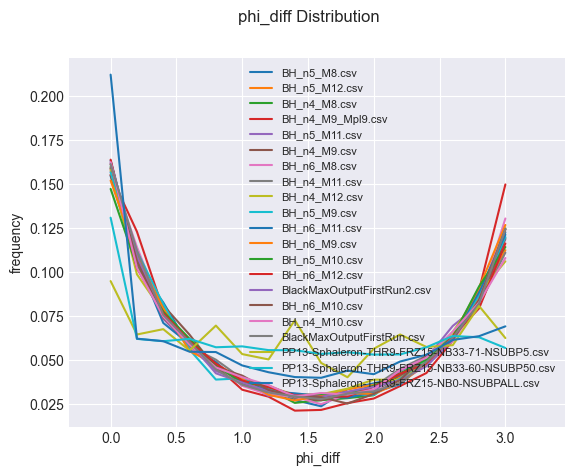

In [19]:
plotter(data_variables, data_sample, labels, filter_strengths = [0.95, 0.975, 0.99, 0.95, 1], binsizes = [50, 50, 0.5, 50, 0.2])